In [7]:
import pandas as pd 

In [9]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [15]:
df = pd.read_csv(r'C:\Users\Aniket\Downloads\houseprice\Housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [52]:
df.shape

(545, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [56]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Data Cleaning

In [58]:
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

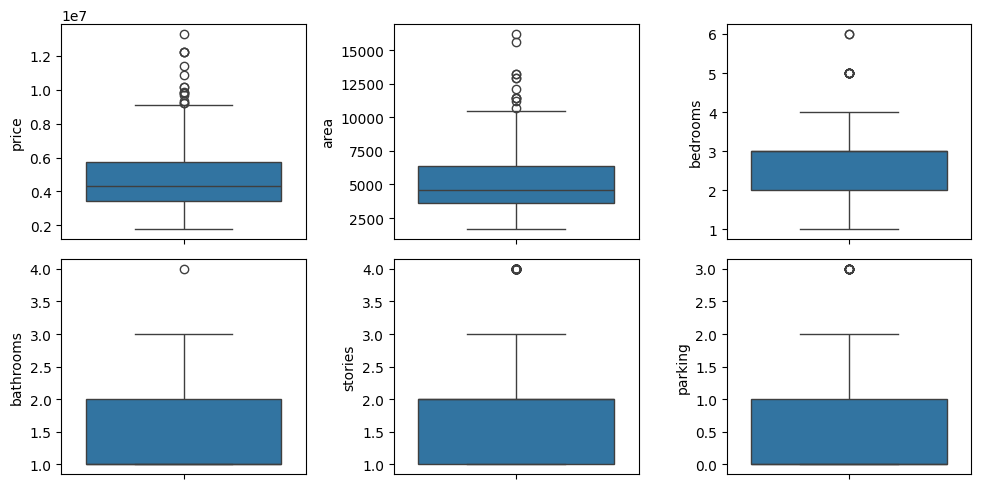

In [31]:

# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

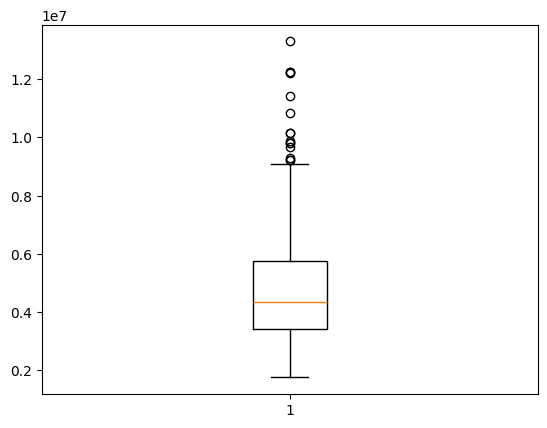

In [33]:
# outlier treatment for price
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

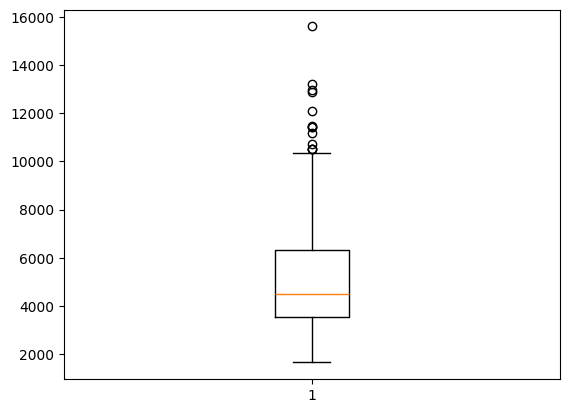

In [37]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 =df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df= df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

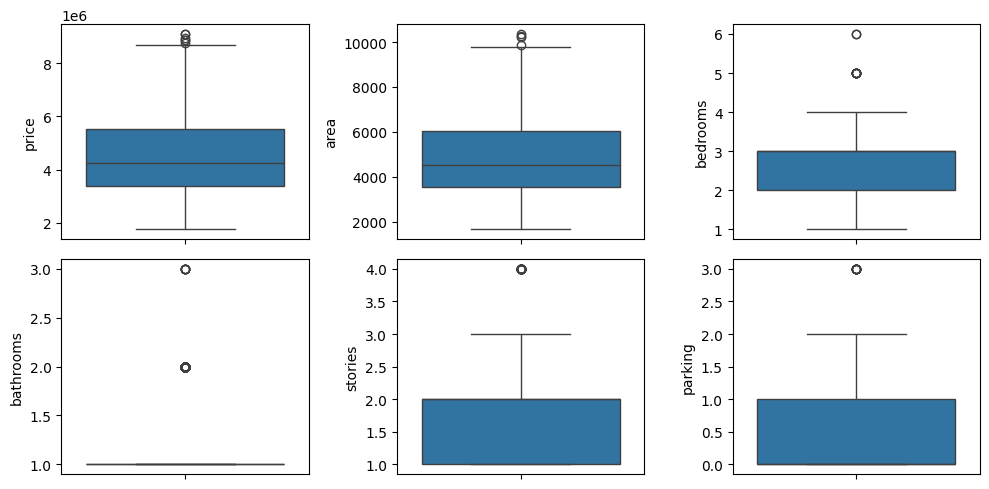

In [39]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

Exploratory Data Analytics

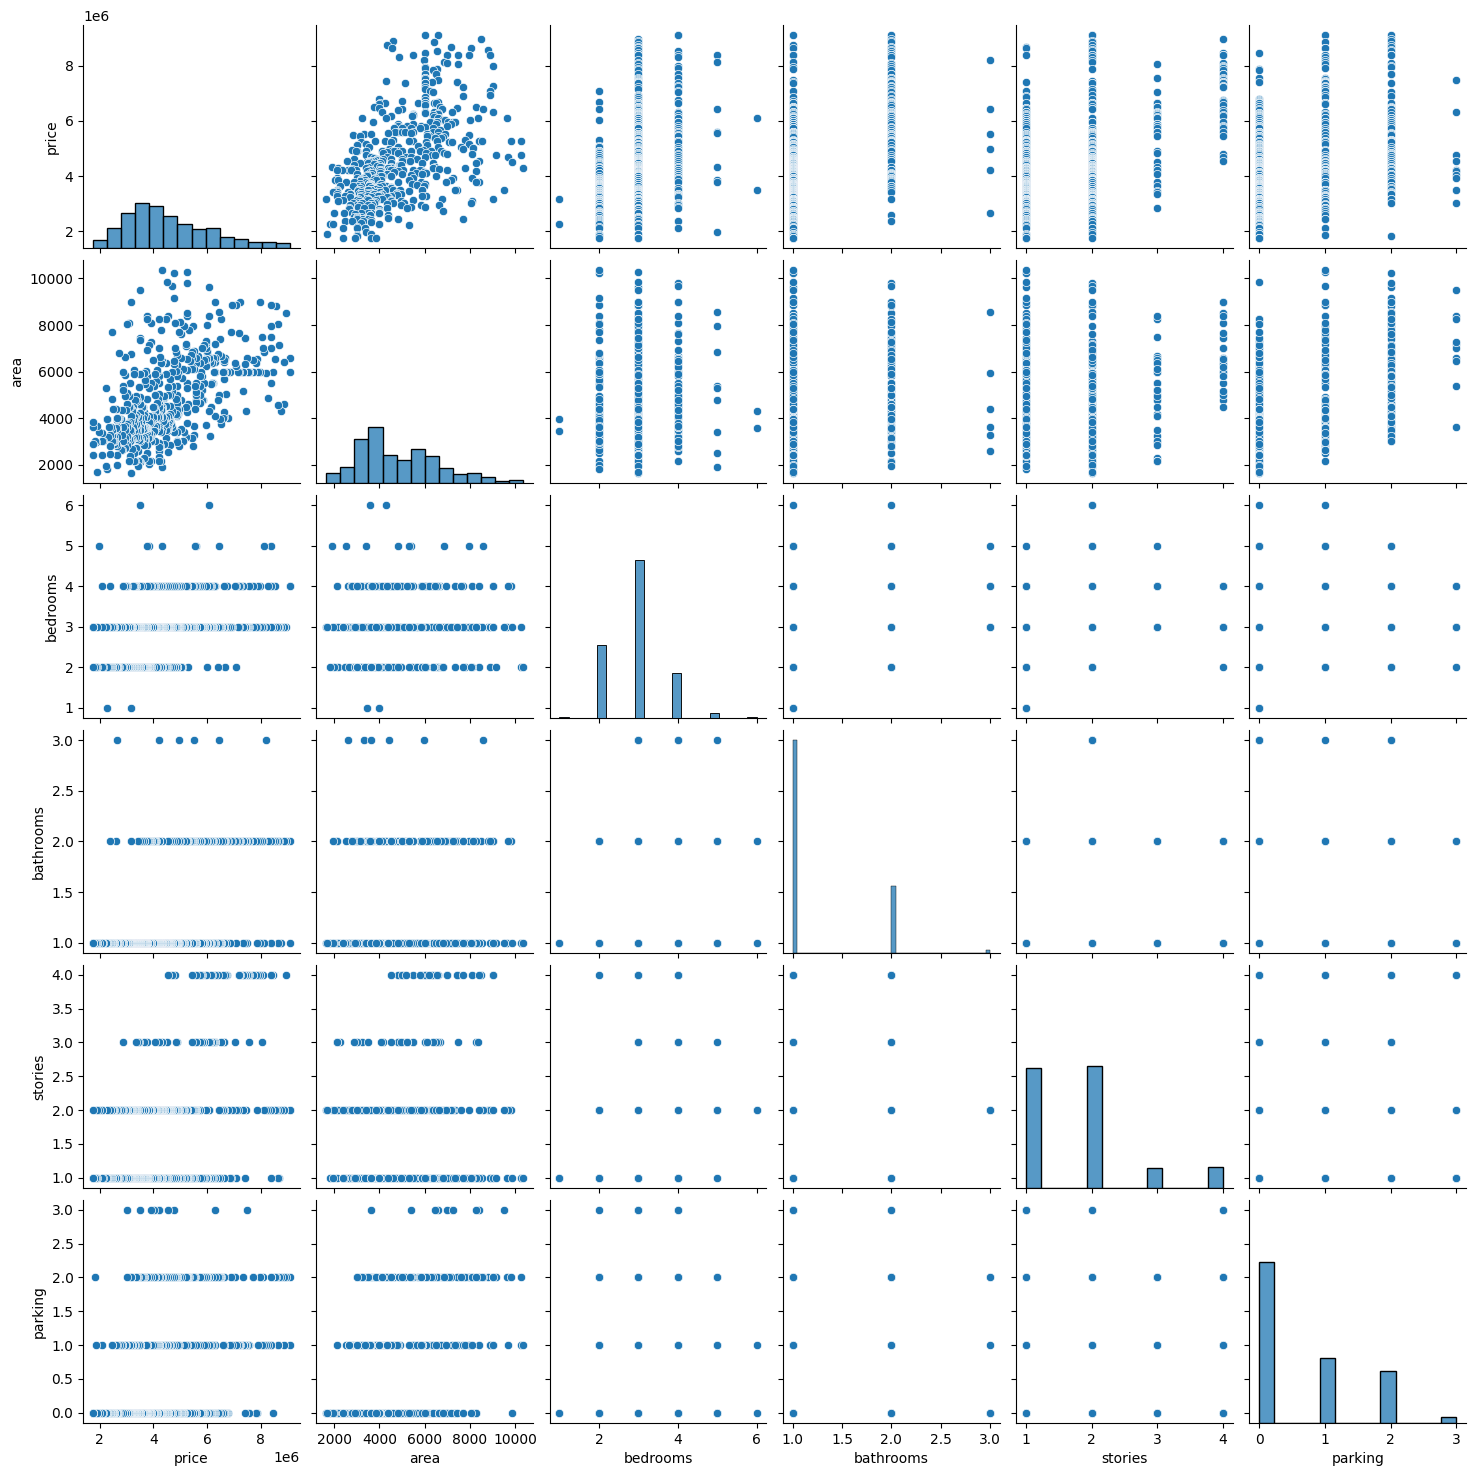

In [44]:
sns.pairplot(df)
plt.show()

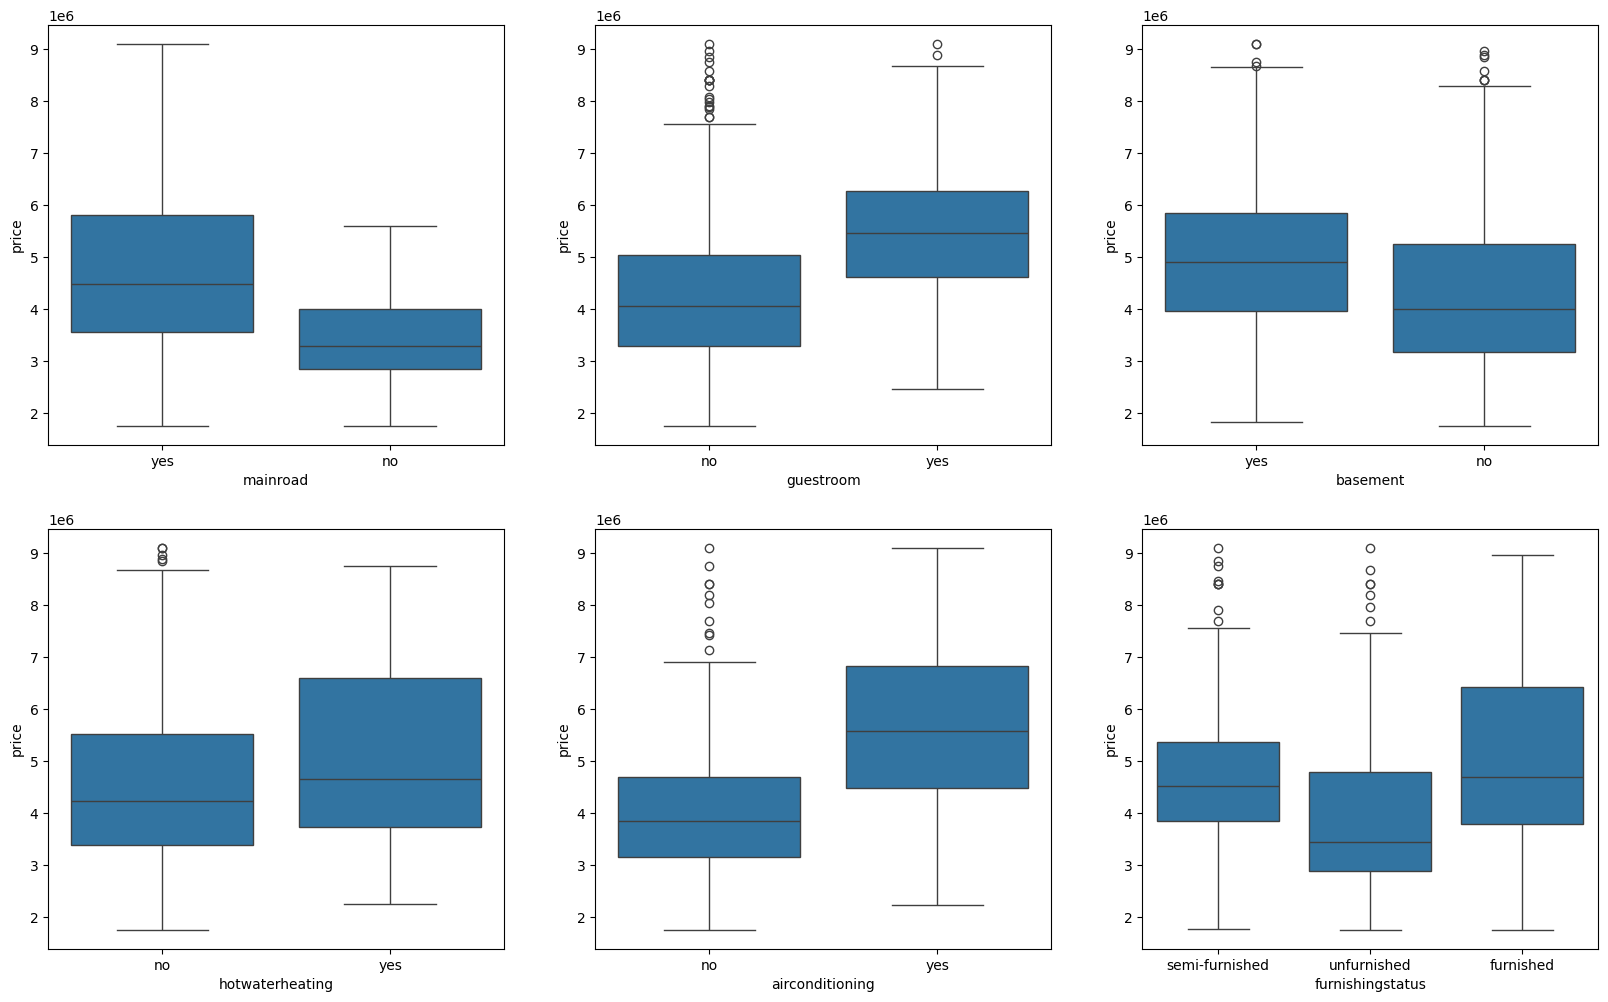

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

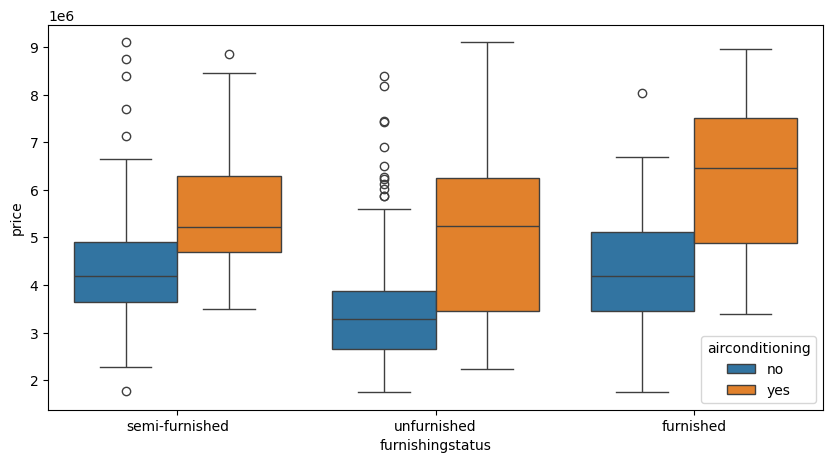

In [50]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

Data Preparation

In [53]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [57]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


Dummy Variables

In [63]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(df['furnishingstatus'])

In [65]:
status.head()


,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [67]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [71]:
# Add the results to the original housing data
df = pd.concat([df, status], axis = 1)

In [75]:
# Now let's see the head of our dataframe.

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [79]:
# Drop 'furnishingstatus' as we have created the dummies for it

df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [81]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


Splitting the Data into Training and Testing Sets

In [60]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split( df, train_size = 0.7, test_size = 0.3, random_state = 100)

Min-Max scaling


In [45]:
from sklearn.preprocessing import MinMaxScaler


In [34]:
scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,0.169697,0.155227,0.4,0.0,0.000000,yes,no,no,no,no,0.333333,no,unfurnished
19,0.615152,0.403379,0.4,0.5,0.333333,yes,no,no,no,yes,0.333333,yes,semi-furnished
159,0.321212,0.115628,0.4,0.5,0.000000,yes,yes,yes,no,yes,0.000000,no,furnished
35,0.548133,0.454417,0.4,0.5,1.000000,yes,no,no,no,yes,0.666667,no,furnished
28,0.575758,0.538015,0.8,0.5,0.333333,yes,no,yes,yes,no,0.666667,no,unfurnished


In [40]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.242345
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.285933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


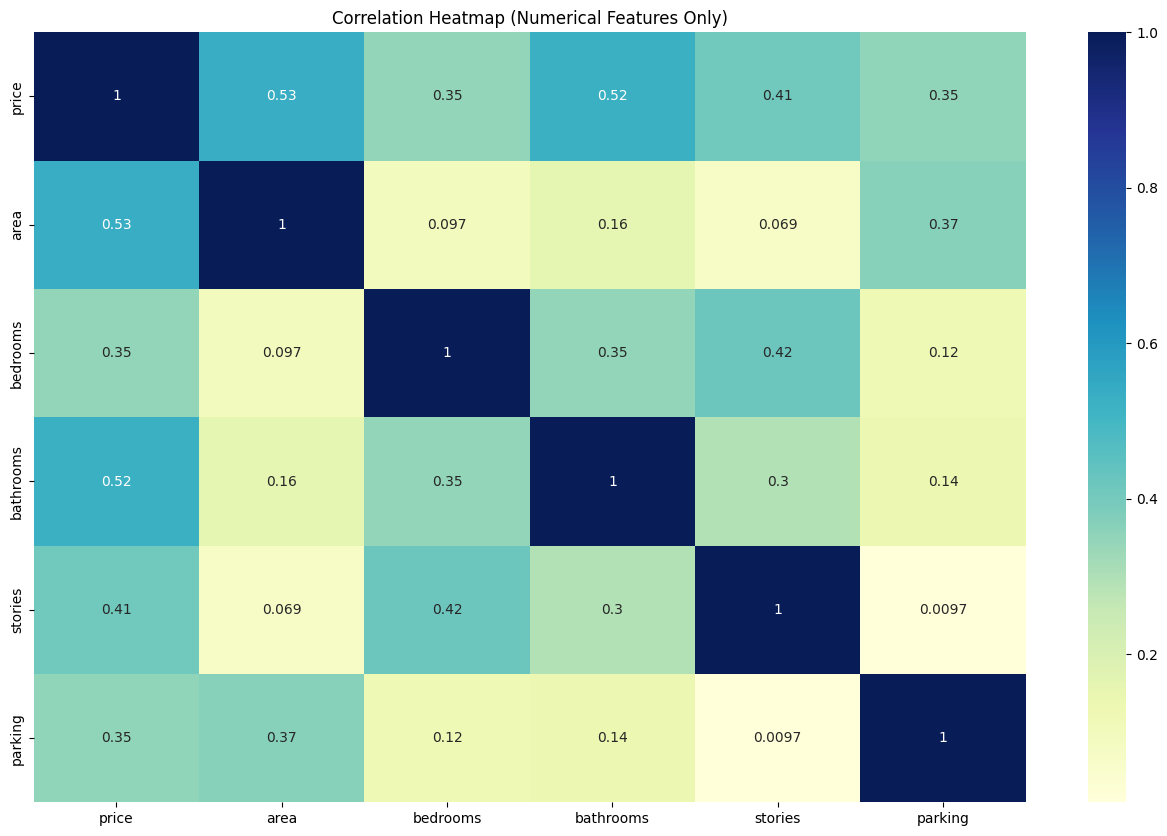

In [48]:
# Only select numerical columns for correlation
numeric_df = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

Dividing into X and Y sets for the model building

In [62]:
y_train = df_train.pop('price')
X_train = df_train

Model Building

Recursive feature elimination

In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
X_train.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [66]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [65]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('parking', False, 4),
 ('mainroad_yes', False, 3),
 ('guestroom_yes', False, 5),
 ('basement_yes', False, 7),
 ('hotwaterheating_yes', True, 1),
 ('airconditioning_yes', True, 1),
 ('prefarea_yes', True, 1),
 ('furnishingstatus_semi-furnished', False, 8),
 ('furnishingstatus_unfurnished', False, 6)]

In [72]:
col = X_train.columns[rfe.support_]
col

Index(['bathrooms', 'mainroad_yes', 'guestroom_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes'],
      dtype='object')

In [75]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [74]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [80]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
print(X.dtypes)



bathrooms              int64
mainroad_yes            bool
guestroom_yes           bool
hotwaterheating_yes     bool
airconditioning_yes     bool
prefarea_yes            bool
dtype: object


In [86]:
X = X.apply(pd.to_numeric, errors='coerce')



In [88]:
X = X.dropna()  # or X.fillna(0) — depending on context


Residual Analysis of the train data

In [95]:
lm.fit(X_train_rfe, y_train)
y_train_price = lm.predict(X_train_rfe)

In [97]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = X_train.loc[:, rfe.support_]

In [99]:
res = (y_train_price - y_train)

In [101]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

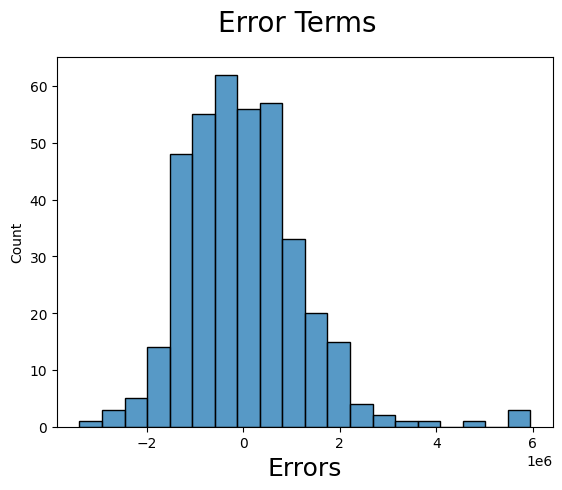

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

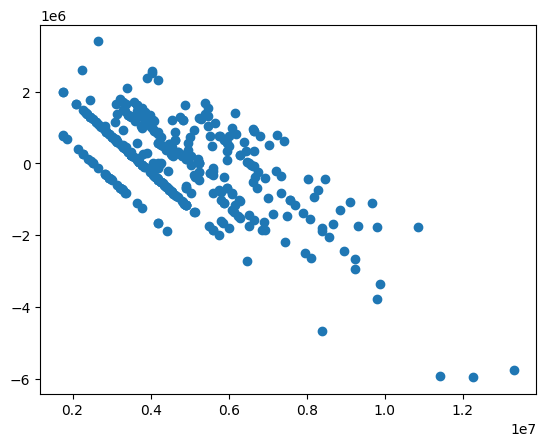

In [111]:
plt.scatter(y_train,res)
plt.show()

Model Evaluation

In [1]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [23]:
# Check the data types of your numeric variables
print(df[num_vars].dtypes)

area                int64
stories             int64
bathrooms           int64
airconditioning    object
prefarea           object
parking             int64
price               int64
dtype: object


In [25]:
# Quickly find non-numeric values
for col in num_vars:
    non_numeric = df[col].apply(lambda x: isinstance(x, str)).sum()
    if non_numeric > 0:
        print(f"Column '{col}' has {non_numeric} string entries")

Column 'airconditioning' has 545 string entries
Column 'prefarea' has 545 string entries


In [33]:
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [57]:
df_test = pd.read_csv("Housing.csv")

In [61]:
# Replace 'yes'/'no' strings with 1/0 in relevant columns
for col in num_vars:
    if df_test[col].dtype == 'object':
        if set(df_test[col].dropna().unique()) <= {'yes', 'no'}:
            df_test[col] = df_test[col].map({'yes': 1, 'no': 0})

In [63]:
scaler = StandardScaler()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('price')
X_test = df_test